<a href="https://colab.research.google.com/github/arghac14/ComparativeAnalysis-and-Prediction-of-CropProductions/blob/master/Predictions/Sirohi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [105]:
from google.colab import files
uploaded = files.upload()

Saving Sirohi.xlsx to Sirohi.xlsx


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Sirohi.xlsx']))

In [0]:
df.columns = [''] * len(df.columns)
df.columns = ['Year', 'Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','TGM(Tonnes)','Irrigated_area(hec)','Yield']

In [110]:
df

,Year,Rainfall(mm),Area(hec),Seed_distribution,SRR%,Fertilizer_consumption(kg/hec),TGM(Tonnes),Irrigated_area(hec),Yield
0,2007-08,776.2,39000,12100,31.03,124.14,11,39147,2356
1,2008-09,342.9,25000,3232,12.93,123.50,5,24733,2129
2,2009-10,902.8,20000,7000,35.00,61.15,5,17966,2449
3,2010-11,941.8,39045,6924,17.73,138.71,8,38277,2929
4,2011-12,752.1,37254,3614,9.70,121.51,7,36755,2715
5,2012-13,815.7,35949,5600,15.58,142.41,5,35831,2758
6,2013-14,966.5,34035,5754,18.91,148.12,7,33790,2765
7,2014-15,723.4,26851,4025,14.99,188.81,6,26835,2323
8,2015-16,1097.0,34226,5465,15.97,119.81,5,33973,2677
9,2016-17,954.9,92531,23178,25.05,158.17,15,37267,2897


## Showing correlation between dependent and independent variables

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

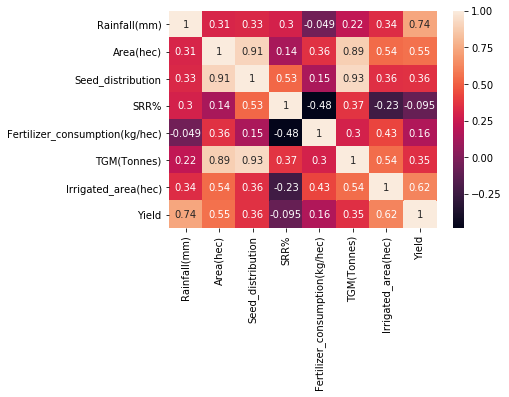

In [112]:
sb.heatmap(df.corr(),annot=True)

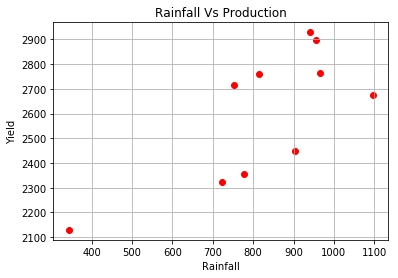

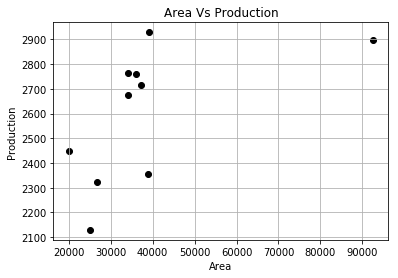

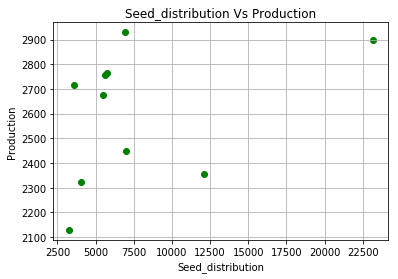

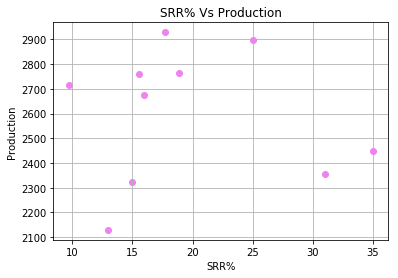

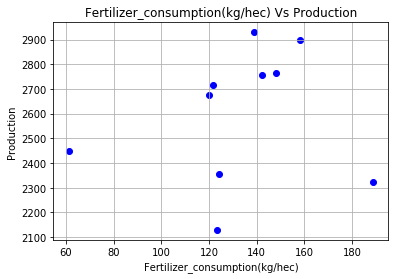

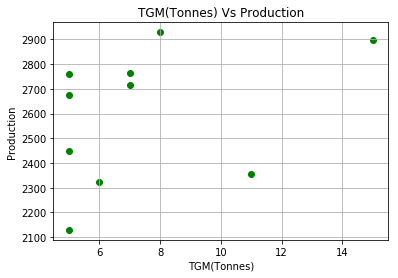

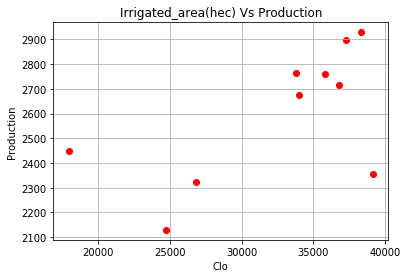

In [113]:
plt.scatter(df['Rainfall(mm)'],df['Yield'],color='red')
plt.title("Rainfall Vs Production")
plt.xlabel("Rainfall")
plt.ylabel("Yield")
plt.grid()
plt.show()
plt.scatter(df['Area(hec)'],df['Yield'],color='black')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

plt.scatter(df['Seed_distribution'],df['Yield'],color='green')
plt.title("Seed_distribution Vs Production")
plt.xlabel("Seed_distribution")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['SRR%'],df['Yield'],color='violet')
plt.title("SRR% Vs Production")
plt.xlabel("SRR%")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Fertilizer_consumption(kg/hec)'],df['Yield'],color='blue')
plt.title("Fertilizer_consumption(kg/hec) Vs Production")
plt.xlabel("Fertilizer_consumption(kg/hec)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['TGM(Tonnes)'],df['Yield'],color='green')
plt.title("TGM(Tonnes) Vs Production")
plt.xlabel("TGM(Tonnes)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Irrigated_area(hec)'],df['Yield'],color='red')
plt.title("Irrigated_area(hec) Vs Production")
plt.xlabel("Clo")
plt.ylabel("Production")
plt.grid()
plt.show()


## Multivariate Linear Regression

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [115]:
X = df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'TGM(Tonnes)','Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']] 
Y = df['Yield']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')



Predicted Production: [ 3246.7238255 24309.3794978] 


Coefficients:  [ 4.53990109e-02  4.49947596e-01 -1.95914584e-01  7.92546434e+01
 -7.33298832e+01  2.90354352e+00 -3.71233192e-01] 


R-squared score:  -4574.159030806068 




## Regression (Predicting Production for each District without taking that District as training data) :


In [116]:
error=[]
n=len(df['Yield'])
for i in range(n):
  A_test=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%','TGM(Tonnes)','Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].iloc[df.index==i]
  b_test=df.iloc[df.index==i]['Yield']
  A_train=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%','TGM(Tonnes)', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].drop([i],axis=0)
  b_train=df.drop([i])['Yield']

  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  print('~ District:',df.at[i,'Year'],'-\n','Predicted Production:',b_pred,', ','Actual Production:',[df.loc[i,'Yield']],', ','Error: ',b_pred-df.loc[i,'Yield'])
  error.append(float(b_pred-df.loc[i,'Yield']))
  

~ District: 2007-08 -
 Predicted Production: [3161.84218388] ,  Actual Production: [2356] ,  Error:  [805.84218388]
~ District: 2008-09 -
 Predicted Production: [1874.59412929] ,  Actual Production: [2129] ,  Error:  [-254.40587071]
~ District: 2009-10 -
 Predicted Production: [2286.24026266] ,  Actual Production: [2449] ,  Error:  [-162.75973734]
~ District: 2010-11 -
 Predicted Production: [2720.20448679] ,  Actual Production: [2929] ,  Error:  [-208.79551321]
~ District: 2011-12 -
 Predicted Production: [3017.88995061] ,  Actual Production: [2715] ,  Error:  [302.88995061]
~ District: 2012-13 -
 Predicted Production: [3227.62426719] ,  Actual Production: [2758] ,  Error:  [469.62426719]
~ District: 2013-14 -
 Predicted Production: [2798.43526975] ,  Actual Production: [2765] ,  Error:  [33.43526975]
~ District: 2014-15 -
 Predicted Production: [2477.74462961] ,  Actual Production: [2323] ,  Error:  [154.74462961]
~ District: 2015-16 -
 Predicted Production: [3785.30232508] ,  Actual

**Mean Squared Error:**

In [117]:
import math
print(list(error))

total_error=0
for i in error:
  total_error=total_error+(i*i)
  
mean_squared_error=math.sqrt(total_error/(n))

print("\nMean Squared Error: ",mean_squared_error)

[805.8421838825248, -254.40587070805168, -162.75973734305308, -208.79551321477584, 302.8899506098005, 469.62426719279074, 33.435269746161794, 154.74462960759502, 1108.3023250848137, 14273.86505887708]

Mean Squared Error:  4539.747802750792
